# 규제 선형 모델(Regularized Linear Models)

## 규제 선형 모델의 개요

: 회귀모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어

**선형 모델의 RSS 최소화하는 비용함수의 한계점**
- 학습 데이터에 지나치게 맞추게 되고 회귀계수가 쉽게 커짐
- 테스트 데이터세트에서 예측성능이 저하되기 쉬움

- 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화와 과적합을 방지하기 위해 회귀계수값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 함

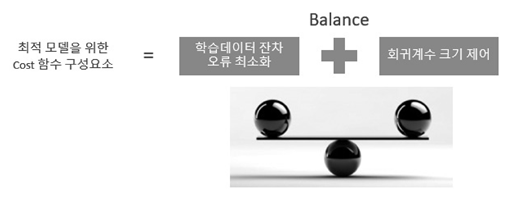

$ 비용함수목표 = Min(RSS(W)) + alpha*||W||_2^2 $

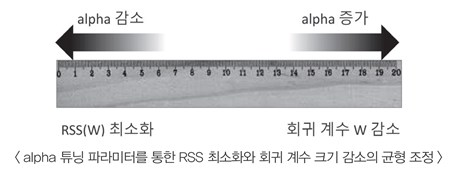

## 릿지회귀(Ridge Regression)

- L2 Norm Reqularization

https://rk1993.tistory.com/entry/Ridge-regression%EC%99%80-Lasso-regression-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0

### 릿지 회귀의 특징
- 변수 간 상관관계가 높은 상황(다중공선성)에서 좋은 예측 성능
- 회귀계수의 크기가 큰 변수를 우선적으로 줄이는 경향이 있음
- 변수 선택 불가능
- 제약범위가 원의 형태

### 사이킷런에서 릿지회귀 클래스 `Rdige`

In [64]:
# 보스톤 주택가격 데이터 세트 이용
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# boston 데이타셋 로드
boston = load_boston()

# X = boston.data
# y = boston.target

# boston 데이타셋 DataFrame 변환 
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
boston_df['PRICE'] = boston.target

y = boston_df['PRICE']
X = boston_df.drop('PRICE', axis=1)

# 릿지회귀로 예측하고, 예측 성능을 cross_cal_score() 평가
ridge = Ridge(alpha=10)

neg_mse = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
mse = neg_mse * (-1)
rmse = np.sqrt(mse)
avg_mse = np.mean(mse)
avg_rmse = np.mean(rmse)

print('5 folds 개별 MSE', np.round(mse, 3))
print('5 folds 개별 RMSE', np.round(rmse, 3))
print('평균 MSE {0:.3f}, 평균 RMSE {1:.3f}'.format(avg_mse, avg_rmse))


5 folds 개별 MSE [11.422 24.294 28.144 74.599 28.517]
5 folds 개별 RMSE [3.38  4.929 5.305 8.637 5.34 ]
평균 MSE 33.395, 평균 RMSE 5.518


=> 규제가 없는 LinearRegression의 RMSE 평균 5.829보다 더 작은 값으로 더 좋은 성능을 보여줌

**Ridge에서 alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정**

In [65]:
alphas = [0, 0.1, 1, 10, 100]

# 릿지회귀로 예측하고, 예측 성능을 cross_cal_score() 평가

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
    mse = neg_mse * (-1)
    rmse = np.sqrt(mse)
    avg_mse = np.mean(mse)
    avg_rmse = np.mean(rmse)

    print('''alpha : {0:.1f}
평균 MSE : {1:.3f}, 평균 RMSE : {2:.3f}'''.format(alpha, avg_mse, avg_rmse))


alpha : 0.0
평균 MSE : 37.132, 평균 RMSE : 5.829
alpha : 0.1
평균 MSE : 36.707, 평균 RMSE : 5.788
alpha : 1.0
평균 MSE : 35.267, 평균 RMSE : 5.653
alpha : 10.0
평균 MSE : 33.395, 평균 RMSE : 5.518
alpha : 100.0
평균 MSE : 29.906, 평균 RMSE : 5.330


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

**각 alpha에 따른 회귀 계수 값을 시각화**
- 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

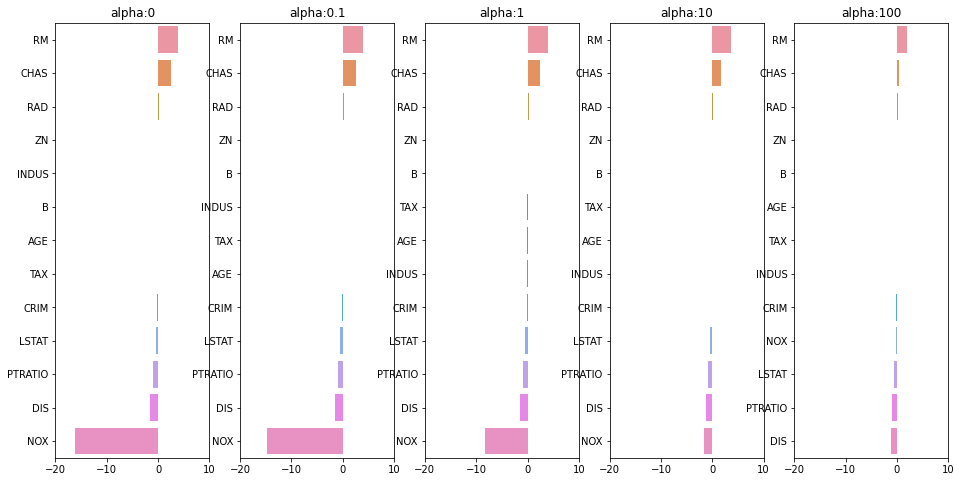

In [67]:
alphas = [0, 0.1, 1, 10, 100]

# 릿지회귀로 예측하고, 예측 성능을 cross_cal_score() 평가

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

coef_df = pd.DataFrame()
fig, axs = plt.subplots(figsize=(16, 8), nrows=1, ncols=5)

for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    # ridge.fit(X, y)
    pred = ridge.predict(X_test)

    # print(f'alpha : {round(alpha,3)} \n회귀계수(coef) : {np.round(ridge.coef_, 1)}')

    # df 에 저장
    colname = 'alpha:'+str(alpha)
    coefs = pd.Series(data=ridge.coef_, index=boston.feature_names)
    coefs = coefs.sort_values(ascending=False)
    coef_df[colname] = coefs

    # 그래프 그리기
    axs[i].set_title(colname)
    axs[i].set_xlim(-20, 10)
    sns.barplot(x=coefs.values, y=coefs.index, ax=axs[i])

plt.show()

**alpha 값에 따른 컬럼별 회귀계수 출력**

In [68]:
coef_df

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.859068,3.869280,3.897485,3.620640,1.972206
CHAS,2.511246,2.510884,2.458686,1.785961,0.483850
RAD,0.242143,0.237723,0.218432,0.211507,0.253968
ZN,0.044466,0.044753,0.046126,0.048609,0.053624
INDUS,0.011342,0.005540,-0.020863,-0.047175,-0.052950
B,0.006814,0.006895,0.007270,0.007688,0.007424
AGE,-0.009985,-0.011441,-0.017914,-0.021636,-0.005280
TAX,-0.011072,-0.011165,-0.011634,-0.012664,-0.014718
CRIM,-0.121310,-0.120763,-0.118309,-0.116008,-0.109848
LSTAT,-0.486738,-0.487785,-0.494047,-0.524099,-0.645917


## 라쏘 회귀(Lasso Regression)

- L1 Norm Reqularization

https://rk1993.tistory.com/entry/Ridge-regression%EC%99%80-Lasso-regression-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0

### 라쏘 회귀의 특징
- 제약 범위가 각진 형태
- 회귀계수 일부가 0이 되어 변수 선택 기법으로 활용
- 변수 간 상관관계 높은 상황에서 Ridge에 비해 상대적으로 예측 성능이 떨어짐

### 사이킷런의 Lasso 회귀를 위한 클래스

### 규제가 있는 회귀모델 적용 함수 get_linear_reg_eval() 작성
- 매개변수로 규제회귀 Ridge, Lasso, ElasticNet을 지정하여 해당 규제 모델을 학습하고 에측성능 출력

In [69]:
alphas = [0.07, 0.1, 0.5, 1, 10]

# 릿지회귀로 예측하고, 예측 성능을 cross_cal_score() 평가

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    neg_mse = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
    mse = neg_mse * (-1)
    rmse = np.sqrt(mse)
    avg_mse = np.mean(mse)
    avg_rmse = np.mean(rmse)

    print('''alpha : {0:.1f}
평균 MSE : {1:.3f}, 평균 RMSE : {2:.3f}'''.format(alpha, avg_mse, avg_rmse))


alpha : 0.1
평균 MSE : 34.895, 평균 RMSE : 5.612
alpha : 0.1
평균 MSE : 34.830, 평균 RMSE : 5.615
alpha : 0.5
평균 MSE : 34.634, 평균 RMSE : 5.669
alpha : 1.0
평균 MSE : 35.532, 평균 RMSE : 5.776
alpha : 10.0
평균 MSE : 46.474, 평균 RMSE : 6.586


**alpha값을 0.07, 0.1, 0.5, 1.3으로 지정한 경우 라쏘모델의 성능 평가**

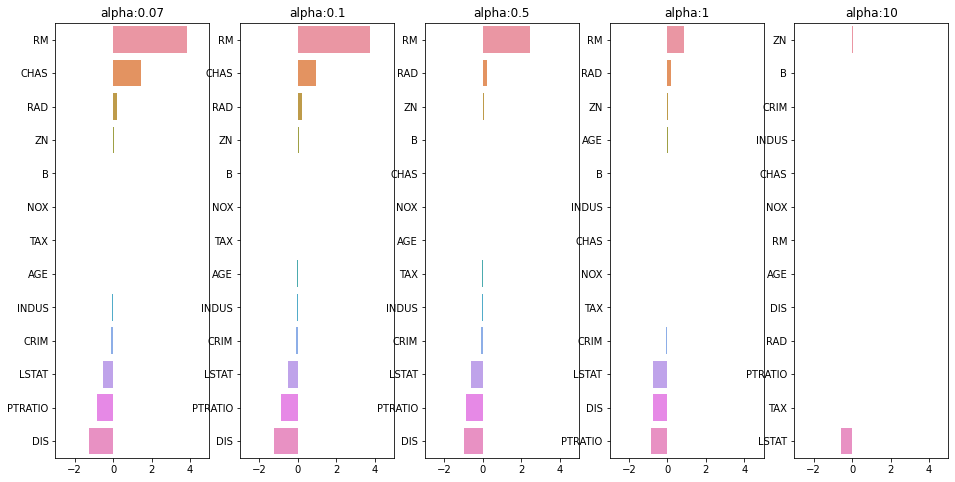

In [70]:
alphas = [0.07, 0.1, 0.5, 1, 10]

# 릿지회귀로 예측하고, 예측 성능을 cross_cal_score() 평가
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

coef_df = pd.DataFrame()
fig, axs = plt.subplots(figsize=(16, 8), nrows=1, ncols=5)

for i, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    # lasso.fit(X, y)
    pred = lasso.predict(X_test)

    # print(f'alpha : {round(alpha,3)} \n회귀계수(coef) : {np.round(lasso.coef_, 1)}')

    # df 에 저장
    colname = 'alpha:'+str(alpha)
    coefs = pd.Series(data=lasso.coef_, index=boston.feature_names)
    coefs = coefs.sort_values(ascending=False)
    coef_df[colname] = coefs

    # 그래프 그리기
    axs[i].set_title(colname)
    axs[i].set_xlim(-3, 5)
    sns.barplot(x=coefs.values, y=coefs.index, ax=axs[i])

plt.show()

**alpha값에 따른 피처별 회귀 계수**

In [71]:
coef_df

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:10
RM,3.812362,3.722896,2.446193,0.868985,0.000000
CHAS,1.468291,0.964789,0.000000,0.000000,0.000000
RAD,0.200164,0.204690,0.209923,0.200074,0.000000
ZN,0.047347,0.047251,0.048207,0.048329,0.031050
B,0.007886,0.007958,0.007505,0.006688,0.006235
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
TAX,-0.012670,-0.012944,-0.013882,-0.013951,-0.010997
AGE,-0.023096,-0.021431,-0.002791,0.012180,0.000000
INDUS,-0.044402,-0.039925,-0.014066,-0.000000,-0.000000
CRIM,-0.113675,-0.113118,-0.092669,-0.065862,-0.000000


## 엘라스틱넷 회귀(ElasticNet Regression)

- L1과 L2 규제를 결합한 회귀


- 비용함수목표 = $RSS(W) + alpha2*||W||_2^2 + alpha1*||W||_1 $


- 수행시간이 오래걸리는 단점이 있음


### 사이킷런의 엘라스틱넷 회귀 클래스 `ElasticNet`

**ElasticNet의 주요 파라미터**

엘라스틱넷의 규제는 $a*L1 + b*L2$로 정의

(여기서 a는 L1규제의 alpha값, b는 L2규제의 alpha 값)

- alpha : a+b
- l1_ratio : a/(a+b)
    - l1_ratio가 0이면 a가 0이므로 L2 규제와 동일
    - l1_ratio가 1이면 b가 0이므로 L1 규제와 동일

**엘라스틱넷에 사용될 alpha값을 변화시키면서 성능평가**

In [78]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coef=True):
    if verbose:
        print('######',model_name,'######')

    coef_df = pd.DataFrame()
    
    for param in params:
        if model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)

        new_mse = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_mse = np.mean(new_mse * (-1))
        avg_rmse = np.sqrt(avg_mse)

        print('alpha {0:.2f}일 때 5-fold-set 평균 MSE {1:.3f}, 평균 RMSE {2:.3f}'. format(param, avg_mse, avg_rmse))

        model.fit(X_data_n, y_target_n)

        if return_coef:
            coefs = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha'+str(param)
            coef_df[colname] = coefs
            coefs = coefs.sort_values(ascending=False)
    
    return coef_df

In [80]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 10]

coef_lasso_coef = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X, y_target_n=y, verbose=True, return_coef=True)

###### Lasso ######
alpha 0.07일 때 5-fold-set 평균 MSE 34.895, 평균 RMSE 5.907
alpha 0.10일 때 5-fold-set 평균 MSE 34.830, 평균 RMSE 5.902
alpha 0.50일 때 5-fold-set 평균 MSE 34.634, 평균 RMSE 5.885
alpha 1.00일 때 5-fold-set 평균 MSE 35.532, 평균 RMSE 5.961
alpha 10.00일 때 5-fold-set 평균 MSE 46.474, 평균 RMSE 6.817


In [81]:
coef_lasso_coef

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha10
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.026146
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.000000
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.000000
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.009282


In [82]:
ridge_alphas = [0, 0.1, 1, 10, 100]

coef_ridge_coef = get_linear_reg_eval('Ridge', params=ridge_alphas, X_data_n=X, y_target_n=y, verbose=True, return_coef=True)

###### Ridge ######
alpha 0.00일 때 5-fold-set 평균 MSE 37.132, 평균 RMSE 6.094
alpha 0.10일 때 5-fold-set 평균 MSE 36.707, 평균 RMSE 6.059
alpha 1.00일 때 5-fold-set 평균 MSE 35.267, 평균 RMSE 5.939
alpha 10.00일 때 5-fold-set 평균 MSE 33.395, 평균 RMSE 5.779
alpha 100.00일 때 5-fold-set 평균 MSE 29.906, 평균 RMSE 5.469


In [83]:
coef_ridge_coef

,alpha0,alpha0.1,alpha1,alpha10,alpha100
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
NOX,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847
RM,3.809865,3.818233,3.854000,3.702272,2.334536
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
DIS,-1.475567,-1.459626,-1.372654,-1.248808,-1.153390
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856


In [103]:
elasticNet_alphas = [0.1, 0.45, 0.46, 0.5, 0.6, 0.7] # l1_ratio는 0.7로 고정되어 있음

coef_elasticNet_df = get_linear_reg_eval('ElasticNet', params=elasticNet_alphas, X_data_n=X, y_target_n=y, verbose=True, return_coef=True)

###### ElasticNet ######
alpha 0.10일 때 5-fold-set 평균 MSE 33.318, 평균 RMSE 5.772
alpha 0.45일 때 5-fold-set 평균 MSE 31.598, 평균 RMSE 5.621
alpha 0.46일 때 5-fold-set 평균 MSE 31.599, 평균 RMSE 5.621
alpha 0.50일 때 5-fold-set 평균 MSE 31.618, 평균 RMSE 5.623
alpha 0.60일 때 5-fold-set 평균 MSE 31.762, 평균 RMSE 5.636
alpha 0.70일 때 5-fold-set 평균 MSE 32.012, 평균 RMSE 5.658


In [104]:
coef_elasticNet_df

,alpha0.1,alpha0.45,alpha0.46,alpha0.5,alpha0.6,alpha0.7
CRIM,-0.099213,-0.090621,-0.090311,-0.089070,-0.085958,-0.082844
ZN,0.050617,0.052817,0.052832,0.052878,0.052897,0.052812
INDUS,-0.042719,-0.025302,-0.024901,-0.023252,-0.018865,-0.014191
CHAS,0.979706,0.000000,0.000000,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.414154,2.056978,2.028432,1.918419,1.669556,1.452309
AGE,-0.008276,0.006169,0.006493,0.007760,0.010722,0.013427
DIS,-1.173647,-1.002097,-0.996852,-0.975902,-0.923868,-0.872545
RAD,0.283443,0.300880,0.300877,0.300761,0.299824,0.298104
TAX,-0.014814,-0.015994,-0.016005,-0.016046,-0.016128,-0.016184


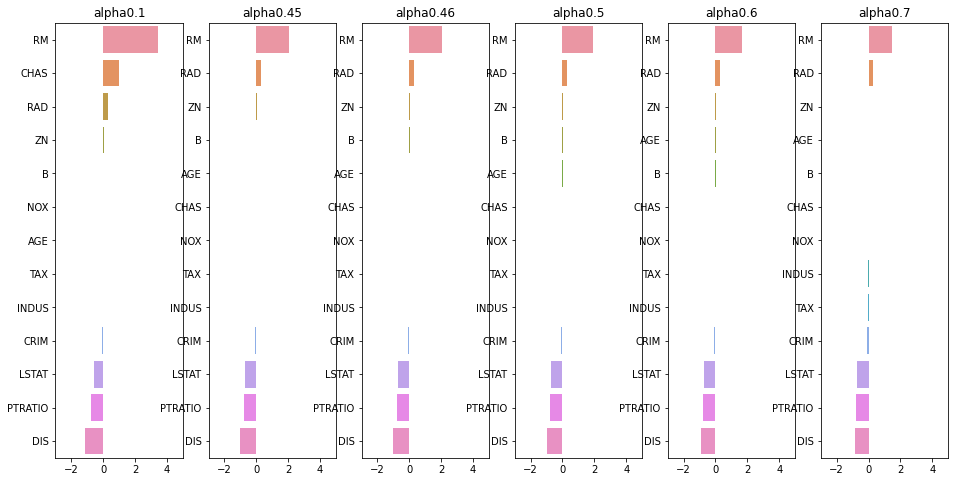

In [109]:
elasticNet_alphas = [0.1, 0.45, 0.46, 0.5, 0.6, 0.7] # l1_ratio는 0.7로 고정되어 있음

fig, axs = plt.subplots(figsize=(16, 8), nrows=1, ncols=6)

for i, alpha in enumerate(elasticNet_alphas):
    colname = 'alpha'+str(alpha)
    coefs = coef_elasticNet_df[colname].sort_values(ascending=False)

    # 그래프 그리기
    axs[i].set_title(colname)
    axs[i].set_xlim(-3, 5)
    sns.barplot(x=coefs.values, y=coefs.index, ax=axs[i])

plt.show()

## 선형 회귀 모델을 위한 데이터 변환

1. StandardScaler 클래스


2. MinMaxScaler 클래스


3. 스케일링/정규화를 수행한 데이터세트에 다시 다항특성을 적용하여 변환
    - 스케일링/정규화를 했으나 예측성능에 향상이 없을 경우
    
    
4. 비대칭분포(오른쪽으로 꼬리가 긴 분포)의 경우 로그 변환

**데이터변환을 위한 함수 get_scaled_data() 작성**

In [120]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 

def get_scaled_data(method=None, p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else :
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

**보스톤 주택가격데이터**

:Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출

In [121]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출 

alphas = [0.1, 1, 10, 50, 100]
scaleMethods = [(None, None), ('Standard', None), ('Standard', 2),
('MinMax', None), ('MinMax', 2), ('Log', None)]

# 변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 

for method in scaleMethods:
    X_scaled = get_scaled_data(method[0], method[1], X)
    print(X_scaled.shape, X.shape)
    print('## 변환 유형 : {0}, Polynomial Degree : {1} ##'.format(method[0], method[1]))

    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_scaled, y_target_n=y, verbose=False, return_coef=False)



(506, 13) (506, 13)
## 변환 유형 : None, Polynomial Degree : None ##
alpha 0.10일 때 5-fold-set 평균 MSE 36.707, 평균 RMSE 6.059
alpha 1.00일 때 5-fold-set 평균 MSE 35.267, 평균 RMSE 5.939
alpha 10.00일 때 5-fold-set 평균 MSE 33.395, 평균 RMSE 5.779
alpha 50.00일 때 5-fold-set 평균 MSE 30.770, 평균 RMSE 5.547
alpha 100.00일 때 5-fold-set 평균 MSE 29.906, 평균 RMSE 5.469
(506, 13) (506, 13)
## 변환 유형 : Standard, Polynomial Degree : None ##
alpha 0.10일 때 5-fold-set 평균 MSE 37.102, 평균 RMSE 6.091
alpha 1.00일 때 5-fold-set 평균 MSE 36.842, 평균 RMSE 6.070
alpha 10.00일 때 5-fold-set 평균 MSE 34.999, 평균 RMSE 5.916
alpha 50.00일 때 5-fold-set 평균 MSE 32.488, 평균 RMSE 5.700
alpha 100.00일 때 5-fold-set 평균 MSE 32.342, 평균 RMSE 5.687
(506, 104) (506, 13)
## 변환 유형 : Standard, Polynomial Degree : 2 ##
alpha 0.10일 때 5-fold-set 평균 MSE 96.003, 평균 RMSE 9.798
alpha 1.00일 때 5-fold-set 평균 MSE 54.610, 평균 RMSE 7.390
alpha 10.00일 때 5-fold-set 평균 MSE 32.367, 평균 RMSE 5.689
alpha 50.00일 때 5-fold-set 평균 MSE 24.281, 평균 RMSE 4.928
alpha 100.00일 때 5-fold-set 평균 MSE